<a href="https://colab.research.google.com/github/alameenwaziri/Machine-Learning-with-Apache-Spark/blob/main/Module_1_5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Customer Clustering with KMeans to Boost Business Strategy


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to use the KMeans algorithm to cluster customer data.</p>


## __Table of Contents__
<ol>
  <li>
    <a href="#Objectives">Objectives
    </a>
  </li>
  <li>
    <a href="#Datasets">Datasets
    </a>
  </li>
  <li>
    <a href="#Setup">Setup
    </a>
    <ol>
      <li>
        <a href="#Installing-Required-Libraries">Installing Required Libraries
        </a>
      </li>
      <li>
        <a href="#Importing-Required-Libraries">Importing Required Libraries
        </a>
      </li>
    </ol>
  </li>
  <li>
    <a href="#Examples">Examples
    </a>
    <ol>
      <li>
        <a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe
        </a>
      </li>
      <li>
        <a href="#Task-2---Decide-how-many-clusters-to-create">Task 2 - Decide how many clusters to create
        </a>
      </li>
      <li>
        <a href="#Task-3---Create-a-clustering-model">Task 3 - Create a clustering model
        </a>
      </li>
      <li>
        <a href="#Task-4---Make-Predictions">Task 4 - Make Predictions
        </a>
      </li>        
    </ol>
  </li>

  <li>
    <a href="#Exercises">Exercises
    </a>
  </li>
  <ol>
    <li>
      <a href="#Exercise-1---Load-the-data-in-a-csv-file-into-a-dataframe">Exercise 1 - Load the data in a csv file into a dataframe
      </a>
    </li>
    <li>
      <a href="#Exercise-2---Decide-how-many-clusters-to-create">Exercise 2 - Decide how many clusters to create
      </a>
    </li>
    <li>
      <a href="#Exercise-3---Create-a-clustering-model">Exercise 3 - Create a clustering model
      </a>
    </li>
    <li>
      <a href="#Exercise-4---Make-Predictions">Exercise 4 - Make Predictions
      </a>
    </li>
  </ol>
</ol>














## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Use K Means algorithm to cluter the data.



## Datasets

In this lab you will be using dataset(s):

 - Modified version of Wholesale customers dataset. Original dataset available at https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
 - Seeds dataset. Available at https://archive.ics.uci.edu/ml/datasets/seeds



## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install pandas==1.3.4
# !pip install scikit-learn==0.20.1


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Clustering demo with generated sample data


In [3]:
# Generate sample data for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# X now contains 300 rows of data spread across 4 clusters that was generated by the make_blobs function.
# In real life we would use an existing data set.

In [4]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [5]:
# Print cluster centers
kmeans.cluster_centers_

array([[ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263],
       [ 1.98258281,  0.86771314]])

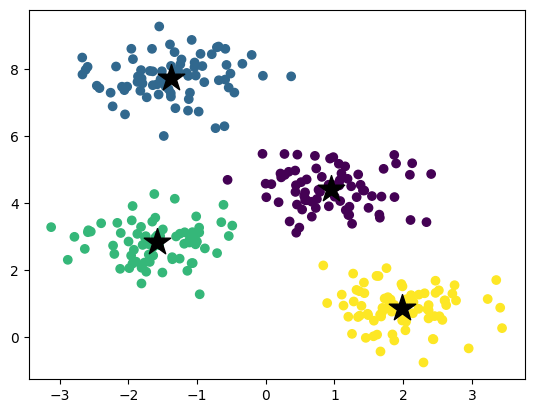

In [6]:
# Plot the clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=400, color='black')
plt.show()

End of Demo


# Examples


## Task 1 - Load the data in a csv file into a dataframe


In [7]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/customers.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

Let's look at some sample rows from the dataset we loaded:


In [8]:
# show 5 random rows from the dataset
df.sample(5)

,Fresh_Food,Milk,Grocery,Frozen_Food
432,21117,1162,4754,269
46,3103,14069,21955,1668
55,5264,3683,5005,1057
291,6022,3354,3261,2507
433,1982,3218,1493,1541


Let's find out the number of rows and columns in the dataset:


In [9]:
df.shape

(440, 4)

Let's plot the histograms of all columns


array([[<Axes: title={'center': 'Fresh_Food'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen_Food'}>]], dtype=object)

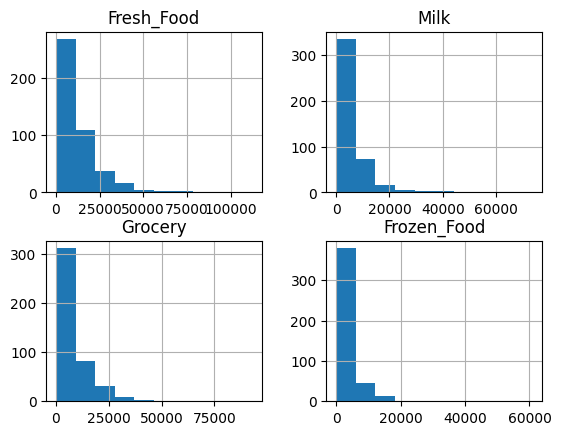

In [10]:
df.hist()

## Task 2 - Decide how many clusters to create


You must tell the KMeans algorithm how many clusters to create out of your data


In [11]:
number_of_clusters = 3

## Task 3 - Create a clustering model


Create a KMeans clustering model


In [12]:
cluster = KMeans(n_clusters = number_of_clusters)

Train the model on the dataset


In [13]:
result = cluster.fit_transform(df)

Your model is now trained. Print cluster centers


In [14]:
cluster.cluster_centers_

array([[ 8119.69387755, 18812.93877551, 27745.36734694,  2011.42857143],
       [35941.4       ,  6044.45      ,  6288.61666667,  6713.96666667],
       [ 8234.99093656,  3824.33836858,  5322.42296073,  2568.73716012]])

## Task 4 - Make Predictions


Make the predictions and save them into the column "cluster_number"


In [15]:
df['cluster_number'] = cluster.predict(df)

In [16]:
df.sample(5)

,Fresh_Food,Milk,Grocery,Frozen_Food,cluster_number
397,11535,1666,1428,6838,2
63,9396,11601,15775,2896,2
159,355,7704,14682,398,2
246,8885,2428,1777,1777,2
64,4760,1227,3250,3724,2


Print the cluster numbers and the number of customers in each cluster


In [17]:
df.cluster_number.value_counts()

,count
cluster_number,
2,331
1,60
0,49


# Exercises


### Exercise 1 - Load the data in a csv file into a dataframe


In [18]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/seeds.csv"


Load the seeds dataset available at URL2


In [19]:
df2 = pd.read_csv(URL2)

### Exercise 2 - Decide how many clusters to create


Cluster the data into 4 clusters


In [20]:
number_of_clusters = 4

### Exercise 3 - Create a clustering model


Create a clustering model and train it using the data in the dataframe


In [21]:
cluster = KMeans(n_clusters = number_of_clusters)
result = cluster.fit_transform(df2)

In [22]:
print(cluster.cluster_centers_)

[[11.91861111 13.25680556  0.85122222  5.225625    2.86531944  4.8855
   5.08747222]
 [19.15104167 16.46916667  0.88708958  6.26885417  3.7729375   3.46041667
   6.12725   ]
 [14.10067797 14.19559322  0.87822373  5.47557627  3.21254237  2.37005424
   5.06584746]
 [16.40806452 15.31935484  0.87826452  5.86396774  3.46332258  3.85009677
   5.69045161]]


### Exercise 4 - Make Predictions


Make the predictions and save them into the column "cluster_number"


In [23]:
df2['cluster_number'] = cluster.predict(df2)

In [24]:
df2.sample(5)

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,cluster_number
24,15.01,14.76,0.8657,5.789,3.245,1.791,5.001,2
189,10.59,12.41,0.8648,4.899,2.787,4.975,4.794,0
53,14.33,14.28,0.8831,5.504,3.199,3.328,5.224,2
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,0
74,16.82,15.51,0.8786,6.017,3.486,4.004,5.841,3


Print the cluster numbers and the number of seeds in each cluster


In [25]:
df2.cluster_number.value_counts()

,count
cluster_number,
0,72
2,59
1,48
3,31


Congratulations you have completed this lab.<br>


Copyright © 2023 IBM Corporation. All rights reserved.
